
# Project: Investigate the Dataset - No Show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

###########
From the dataset options provided, I chose the "No-Show Appointments" dataset for investigation because it is related a healthcare which is a field I am interested in. Also, it gives me the opportunity to determine which factors are important to know in order to predict if a patient will show up for their scheduled appointment.

Overview for No-Show Appointments (Source: https://s3.amazonaws.com/video.udacity-data.com/topher/2018/July/5b57919a_data-set-options/data-set-options.pdf)

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
● ‘ScheduledDay’ tells us on what day the patient set up their appointment.
● ‘Neighborhood’ indicates the location of the hospital.
● ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
● The encoding of the last column is done such that: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

###########

Description of  the Medical Appointment No Shows dataset ( Source: https://www.kaggle.com/joniarroba/noshowappointments)

Context
A person makes a doctor appointment, receives all the instructions and no-show. Who is to blame?

Content
300k medical appointments and its 15 variables (characteristics) of each. The most important one if the patient show-up or no-show the appointment. 

scholarship variable means the following concept:
The "Project Family Grant" of the World Bank, inaugurated in June 2005, collaborates with the Bolsa Familia program, consolidating the various income transfer programs - previously dispersed - reducing their failures and duplication of coverage, strengthening the Scholarship management system to the family and identifying its target audience, as well as developing and monitoring a scientific method to evaluate the effects of the program, and strengthening the basic institutional aspects of its administration.
(Source: https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia)

Data Dictionary
PatientId - Identification of a patient 
AppointmentID - Identification of each appointment 
Gender = Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man. DataMarcacaoConsulta = The day of the actuall appointment, when they have to visit the doctor. 
DataAgendamento = The day someone called or registered the appointment, this is before appointment of course. 
Age = How old is the patient. 
Neighbourhood = Where the appointment takes place. 
Scholarship = True or False . 
Hipertension = True or False 
Diabetes = True or False 
Alcoholism = True or False 
Handcap = True or False 
SMS_received = 1 or more messages sent to the patient. No-show = True or False.

Inspiration
What if that possible to predict someone to no-show an appointment?

###########
Aim of investigation: What factors are important for us to know in order to predict if a patient will show up for their
scheduled appointment?

Research questions:
1. Does the age and gender of a person have any effect on whether a person will show up for their appointment?
2. Does the number of days between the Scheduled Day and the Appointment day along with whether a reminder SMS is received have any effect on whether a person will show up for their appointment?
3. Does receiving an incentive like a scholarship have a role to play in whether a person will show up for their appointment?
4. Does the medical condition a patient is suffering from impact whether a person will show up for their appointment?
5. Does the number of medical conditions a person is suffering from impact whether a person will show up for their appointment?

Note: 
The 8 independent variables in my analysis are: Age, Gender, SMS_received, Scholarship, Hypertension, Diabetes, Alcoholism and handicap.
The 2 dependent variables in my analysis are: days_delta (the difference in days between the Scheduled Day and the Appointment Day) and sum_diseases (the sum of the number of medical conditions that a person has).

###########
The steps I have followed to investigate the data are as follows:
- Data Wrangling
- Data Cleaning
- Exploratory Data Analysis
- Answering Research Questions
- Data Visulaizations 
- Drawing Conclusions


In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%lsmagic

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading the packages required.


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv', index_col=None, parse_dates=["ScheduledDay", "AppointmentDay"], infer_datetime_format=True)
print(df.head())

# Importing the dataset using the read() function. 
# Printing out the five lines of the dataset using the head() function.


      PatientId  AppointmentID Gender        ScheduledDay AppointmentDay  Age  \
0  2.987250e+13        5642903      F 2016-04-29 18:38:08     2016-04-29   62   
1  5.589978e+14        5642503      M 2016-04-29 16:08:27     2016-04-29   56   
2  4.262962e+12        5642549      F 2016-04-29 16:19:04     2016-04-29   62   
3  8.679512e+11        5642828      F 2016-04-29 17:29:31     2016-04-29    8   
4  8.841186e+12        5642494      F 2016-04-29 16:07:23     2016-04-29   56   

       Neighbourhood  Scholarship  Hipertension  Diabetes  Alcoholism  \
0    JARDIM DA PENHA            0             1         0           0   
1    JARDIM DA PENHA            0             0         0           0   
2      MATA DA PRAIA            0             0         0           0   
3  PONTAL DE CAMBURI            0             0         0           0   
4    JARDIM DA PENHA            0             1         1           0   

   Handcap  SMS_received No-show  
0        0             0      No  
1   

In [4]:
df.rename(columns = {'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'No-show': 'NoShow'}, inplace = True)
print(df.columns)

# In the dataset, some column names are spelt erroneously. 
#I have renamed selected columns so that they are free of typos and easy to read, namely,
#'Hipertension' -->'Hypertension', 'Handcap' --> 'Handicap' and 'No-show'--> 'NoShow'.

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'NoShow'],
      dtype='object')


In [5]:
df.shape
# Finding out the dimensions of the dataframe (i.e. the number of rows and columns) using the shape() function.
# The output shows that there are 110527 rows and 14 columns.

(110527, 14)

In [6]:
df.describe()
#Viweing basic statistical details like the count, mean,standard deviation, percentile etc.using the describe() function.

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


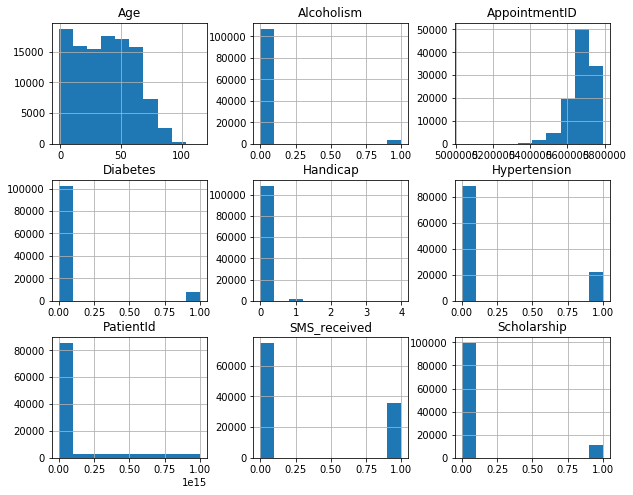

In [7]:
df.hist(figsize=(10,8));
# Creating histograms for the numerical columns in the dataset to analyze the attributes of each column.

In [8]:
#print('PatientId:',sorted(df.PatientId.unique()))
#print('AppointmentID',sorted(df.AppointmentID.unique()))
print('Age:',sorted(df.Age.unique()))
print('Scholarship:',df.Scholarship.unique())
print('Gender:',df.Gender.unique())
print('Hypertension:',df.Hypertension.unique())
print('Diabetes:',df.Diabetes.unique())
print('Alcoholism:',df.Alcoholism.unique())
print('Handicap:',df.Handicap.unique())
print('Sms_Received:',df.SMS_received.unique())

# Checking for erroneous values in the data like missing values, null values and NaNs using the unique() function. 
# The output shows that there are no missing values or NaNs present. However, the dataset does containg erroneous data.
# For example, negative values for age and absurdly high values for age like 115.
# In the documentation, the handicap is given as a binary variable column having values as either True or False.
# However,the handicap column in the given dataset is multinomial variable, it has 5 values ranging from 0 to 4.
#(Source: https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia)
# Also, the ScheduledDay column has both date and time which can be converted to datetime format.

Age: [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]
Scholarship: [0 1]
Gender: ['F' 'M']
Hypertension: [1 0]
Diabetes: [0 1]
Alcoholism: [0 1]
Handicap: [0 1 2 3 4]
Sms_Received: [0 1]


In [9]:
print(df.groupby('NoShow').size())

# Since No Show is the focus of the analysis,checking its breakdown. 
# The output shows that 22319 out of 110527 of the patients have been recorded as No show.

NoShow
No     88208
Yes    22319
dtype: int64


In [10]:
no_show = df.loc[df.NoShow == 'Yes']
show = df.loc[df.NoShow == 'No']

len(no_show)/(len(no_show)+len(show)) * 100

#Finding the total percentage of No show.
# Total No show percentage is 20.12%.

20.193255946510806

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (for values out of range and formatting)

In [11]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

print(df['Age'].min())
print(df['Age'].max() )

#Finding the minimum and maximum values of the column 'Age'
#The minimum age is a negative value like 1 and the maximum age is an absurdly large value like 115.
# Therefore, there is a need to remove these outlier values.

df = df[(df.Age >= 0) & (df.Age <= 100)]
df['Age'].head()

#Filtering out all ages below 0 and greater than 100 by subsetting.


-1
115


0    62
1    56
2    62
3     8
4    56
Name: Age, dtype: int64

In [12]:
df['Handicap'] = df['Handicap'].apply(lambda x: 1 if x != 0 else x)
df['Handicap'].head()

# As  observed previosly, in the documentation, the handicap is given as a binary variable column having values as either 
# True or False.
# However,the handicap column in the given dataset is multinomial variable, it has 5 values ranging from 0 to 4.
# (Source: https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia)

# There could be multiple approaches to resolve this issue,namely,
# 1. Drop the handicap column since the data seems to be corrupt.
# 2. Keep just the values 0 and 1 since it is supposed to be a binary variable and drop the rest, i.e., values 2 to 4.
# 3. To make the column binary, keep the value 0 as it is and convert the values to 4 to 1.

# I have chosen the third option because the range of values in the handicap column could indicate 
# the seriousness of the condition.
# Therefore, by converting values ranging from 2 to 4 --> 1,I have 
# - Retained the records in the handicap column ranging from 2 to 4 
# - Converted the column to binary since that is how it is described in the documentation. 

0    0
1    0
2    0
3    0
4    0
Name: Handicap, dtype: int64

In [13]:
df['scheduledDayDateTime'] = pd.to_datetime(df.ScheduledDay.dt.date)
df['scheduledDayDateTime'].head()

# Converting ScheduledDay to datetime format in order to make analysis easier

0   2016-04-29
1   2016-04-29
2   2016-04-29
3   2016-04-29
4   2016-04-29
Name: scheduledDayDateTime, dtype: datetime64[ns]

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 -  Does the age and gender of a person have any effect on whether a person will show up for their appointment?

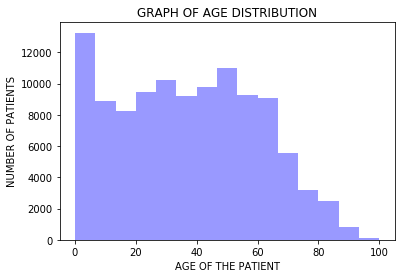

In [14]:
g = sns.distplot(df['Age'],color = 'blue', kde=False, bins=15)
plt.xlabel('AGE OF THE PATIENT')
plt.ylabel('NUMBER OF PATIENTS')
plt.title('GRAPH OF AGE DISTRIBUTION')
plt.show()

# From the age distribution graph, it can be seen that majority of the patients are below the age of 60.
#The largest group is in the 0-10 age group.

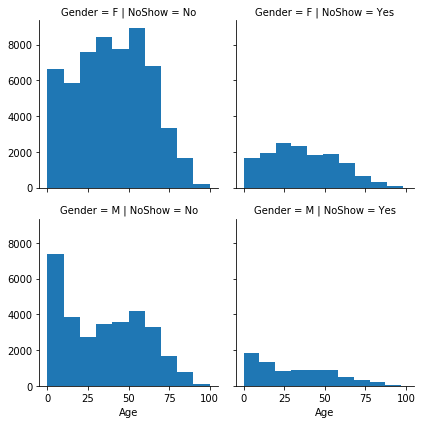

In [16]:
g = sns.FacetGrid(df, col='NoShow', row='Gender')
g.map(plt.hist, 'Age')
plt.show()

#Similarly, creating a graph distribution for genders and No show based on age, 
#There seems to be more No show for females

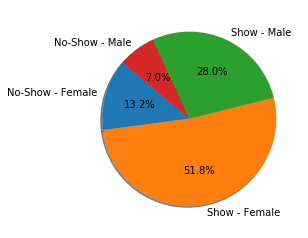

In [24]:
labels = ['No-Show - Female', 'Show - Female', 'Show - Male', 'No-Show - Male']
sizes = [len(df[(df['NoShow'] == 'Yes') & (df['Gender'] == 'F')]),
         len(df[(df['NoShow'] == 'No') & (df['Gender'] == 'F')]),        
         len(df[(df['NoShow'] == 'No') & (df['Gender'] == 'M')]),
         len(df[(df['NoShow'] == 'Yes') & (df['Gender'] == 'M')])]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

# 65% of the patients are female and 35% are male.
# 13.2% of female patients did not show up and 51.8% did.
# Therefore, percentage of No Show for female patients is 13.2/(13.2+51.8)*100 = 20.30%
# 7% of male patients did not show up and 28% did.
# Therefore, percentage of No Show for male patients is 7.0/(7.0+13.2)*100 = 20%
# Therefore, gender does not seem to play a significant role in whether a person turns up for an appointment.

In [25]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

def ageRange (x):
    
    if x >=0 and x < 1 : return '1-Infant'
    elif x >=1 and x < 10 : return '2-Child'
    elif x >=10 and x < 18 : return '3-Adolescent'
    elif x >=18 and x < 60 : return '4-Adult'
    else: return '5-Veteran'

df['AgeClass']= df['Age'].apply(ageRange)
df['AgeClass'].head()

# The age variable can be classified into different groups such as infant, child, adolescent, adult and veteran.
# These subcategories can be further examined for No show to check if the likelihood of No show is more prevelant 
# in a certain age group.

0    5-Veteran
1      4-Adult
2    5-Veteran
3      2-Child
4      4-Adult
Name: AgeClass, dtype: object

NoShow           No    Yes
AgeClass                  
1-Infant       2900    639
2-Child       11091   2845
3-Adolescent   7391   2513
4-Adult       48894  13080
5-Veteran     17927   3239


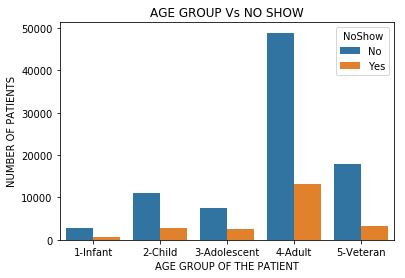

In [26]:
ageClassVsNoShow = pd.crosstab(index = df['AgeClass'], columns = df['NoShow'])  
print(ageClassVsNoShow)
stacked = ageClassVsNoShow.stack().reset_index().rename(columns={0:'value'})
sns.barplot(x=stacked.AgeClass, y=stacked.value, hue=stacked.NoShow);
plt.xlabel('AGE GROUP OF THE PATIENT')
plt.ylabel('NUMBER OF PATIENTS')
plt.title('AGE GROUP Vs NO SHOW')
plt.show()

# Percentage of No Show for each category is:
# Infant --> 639/(2900+639)*100 = 18.06%
# Child --> 2845/(11091+2845)*100 = 20.41%
# Adolescent --> 2513/(7391+2513)*100 = 25.37%
# Adult --> 13080/(48894+13080)*100 = 21.11%
# Veteran --> 3239/(17927+3239)*100 = 15.30%
# It appears as if out all the age groups who schedule an appointment, the maximum No show occours in the veteran category.
# This could be because veterans might find it difficult to travel to the place of appointment, to remember appointments,
# to use phones to check for SMS reminders and so on.


### Research Question 2  - Does the number of days between the Scheduled Day and the Appointment day along with whether a reminder SMS is received have any effect on whether a person will show up for their appointment?

In [29]:
#df["days_delta"] = (df.AppointmentDay - pd.to_datetime(df.ScheduledDay.dt.date)).dt.days
df['days_delta'] = (df.AppointmentDay - df.scheduledDayDateTime).dt.days
df["days_delta"].head()
 
# days_delta is the difference in days between the scheduled day and the appointment day, 
# i.e. the number of days a patient has to wait for the appointment.
# This seemed to be an interesting parameter to derive since if the waiting time is too long, 
# the patient might recover and no longer need the appointment or be more likely to forget about the appointment.


0    0
1    0
2    0
3    0
4    0
Name: days_delta, dtype: int64

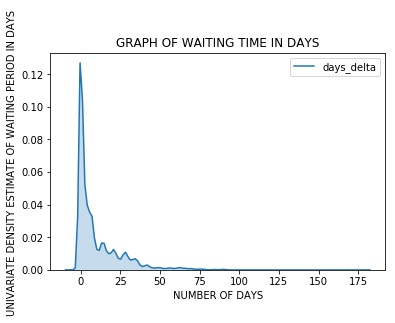

In [30]:
g = sns.kdeplot(df['days_delta'], shade=True)
plt.xlabel('NUMBER OF DAYS')
plt.ylabel('UNIVARIATE DENSITY ESTIMATE OF WAITING PERIOD IN DAYS ')
plt.title('GRAPH OF WAITING TIME IN DAYS')
plt.show()

# Graph distribution of the number of days a patient has to wait for the appointment.
# The graph shows that most of the patients have to wait less than 50 days for their appointment and 
# many patients get appointments on the very same day.

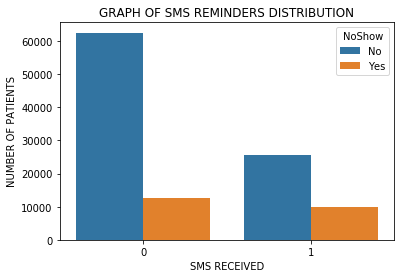

In [31]:
g = sns.countplot(x='SMS_received', hue='NoShow', data=df)
plt.xlabel('SMS RECEIVED')
plt.ylabel('NUMBER OF PATIENTS')
plt.title('GRAPH OF SMS REMINDERS DISTRIBUTION')
plt.show()

# An SMS reminder might be an important factor in decreasing No show.
# From the graph, it can be seen that patients who receive SMS reminders are more likely to show up.

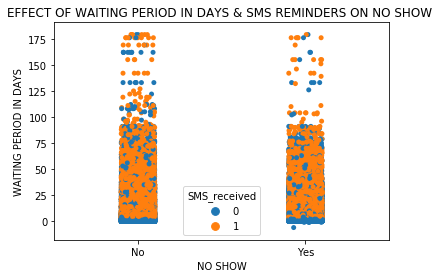

In [32]:
g = sns.stripplot(x='NoShow', y='days_delta', data=df, 
                  hue='SMS_received', jitter=True)
plt.xlabel('NO SHOW')
plt.ylabel('WAITING PERIOD IN DAYS')
plt.title('EFFECT OF WAITING PERIOD IN DAYS & SMS REMINDERS ON NO SHOW ')
plt.show()

# Strip plot to check if the number of days a patient has to wait for the appointment along with whether a reminder SMS 
# is received have any effect on whether a person will show up for their appointment.
# Looking at the strip plot, it appears that the effectiveness of SMS reminders is directly proportional to the number of 
# days of waiting.
# This makes sense because the more the number of days between the Scheduled Day and the Appointment Day, the more likely 
# is a person to forget about the appointment.For a more than 150 day waiting period, the SMS reminder seems to play a 
# significant role in reducing No show.


In [ ]:
### Research Question 3 - Does receiving an incentive like a scholarship have a role to play in whether a person 
# will show up for their appointment?

In [33]:
print(df.groupby('Scholarship').size())

# Checking the breakdown of scholarship. 
# The output shows that 10861 patients received the Bolsa Familia scholarship.

Scholarship
0    99658
1    10861
dtype: int64


In [34]:
scholarship_received = df.loc[df.Scholarship == 1]
scholarship_notReceived = df.loc[df.Scholarship == 0]
len(scholarship_received)/(len(scholarship_received)+len(scholarship_notReceived)) * 100

#Finding the total percentage of people who recieved the scholarship.
# Total percentage of people who received the scholarship is 9.83%.

9.827269519268182

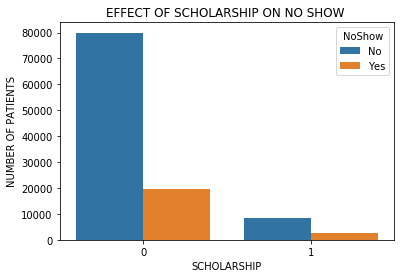

In [35]:
g = sns.countplot(x='Scholarship', hue='NoShow', data=df)
plt.xlabel('SCHOLARSHIP')
plt.ylabel('NUMBER OF PATIENTS')
plt.title('EFFECT OF SCHOLARSHIP ON NO SHOW ')
plt.show()

# Plot to chck the effect of scholarship on No Show
# From the plot, it appears that even though there are less number of people with scholarships, only 10861, the people with
# scholarship have more likelihood of No show.

In [ ]:
### Research Question 4 - Does the medical condition a patient is suffering from impact whether a person will 
# show up for their appointment?

In [37]:
print(df.groupby('Hypertension').size())

# Checking the breakdown of the patients suffering from Hypertension. 

Hypertension
0    88719
1    21800
dtype: int64


In [38]:
hypertension_present = df.loc[df.Hypertension == 1]
hypertension_notPresent = df.loc[df.Hypertension == 0]
len(hypertension_present)/(len(hypertension_present)+len(hypertension_notPresent)) * 100

#Finding the total percentage of people who are suffering from hypertension.
# Total percentage of people who are suffering from hypertension is 19.73%.

19.725115138573457

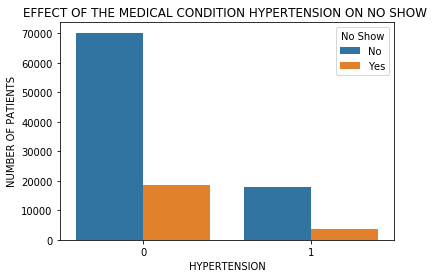

In [36]:
# Plot for hypertension wrt No Show
g = sns.countplot(x=df['Hypertension'], hue='NoShow', data=df)
plt.legend(loc='upper right', title='No Show')
plt.xlabel('HYPERTENSION')
plt.ylabel('NUMBER OF PATIENTS')
plt.title('EFFECT OF THE MEDICAL CONDITION HYPERTENSION ON NO SHOW ')
plt.show()

# It can be seen from the plot that, out of the 21800 people who suffer from hypertension,~ 1800 don't show up for their 
# appointment. 
# Approximate percentage of No Show for people suffering from hypertension is: 1800/(21800+1800)*100 = 7.63%

In [39]:
print(df.groupby('Diabetes').size())

# Checking the breakdown of the patients suffering from Diabetes. 

Diabetes
0    102576
1      7943
dtype: int64


In [40]:
diabetes_present = df.loc[df.Diabetes == 1]
diabetes_notPresent = df.loc[df.Diabetes == 0]
len(diabetes_present)/(len(diabetes_present)+len(diabetes_notPresent)) * 100

#Finding the total percentage of people who are suffering from diabetes.
# Total percentage of people who are suffering from diabetes is 7.19%.

7.186999520444449

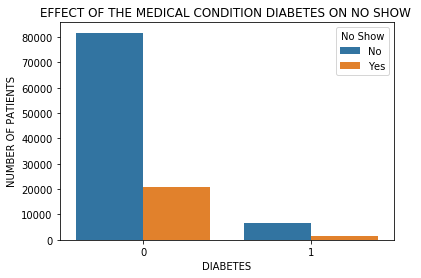

In [48]:
# Plot for diabetes wrt No Show
g = sns.countplot(x=df['Diabetes'], hue='NoShow', data=df)
plt.legend(loc='upper right', title='No Show')
plt.xlabel('DIABETES')
plt.ylabel('NUMBER OF PATIENTS')
plt.title('EFFECT OF THE MEDICAL CONDITION DIABETES ON NO SHOW ')
plt.show()

# It can be seen from the plot that out of the 7943 people who are suffering from diabetes, ~1000 don't show up for 
#their appointment.
# Approximate percentage of No Show for people suffering from diabetes is: 1000/(7943+1000)*100 = 11.18%

In [42]:
print(df.groupby('Alcoholism').size())

# Checking the breakdown of the patients suffering from alcoholism. 

Alcoholism
0    107159
1      3360
dtype: int64


In [43]:
alcoholism_present = df.loc[df.Alcoholism == 1]
alcoholism_notPresent = df.loc[df.Alcoholism == 0]
len(alcoholism_present)/(len(alcoholism_present)+len(alcoholism_notPresent)) * 100

#Finding the total percentage of people who are suffering from alcoholism.
# Total percentage of people who are suffering from alcoholism is 3.04%.

3.040201232367285

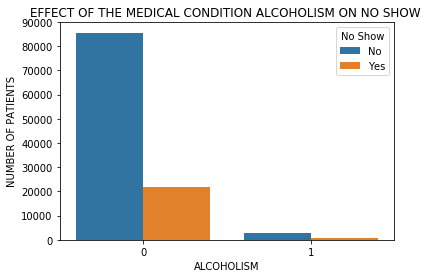

In [47]:
# Plot for alcoholism wrt No Show
g = sns.countplot(x=df['Alcoholism'], hue='NoShow', data=df)
plt.legend(loc='upper right', title='No Show')
plt.xlabel('ALCOHOLISM')
plt.ylabel('NUMBER OF PATIENTS')
plt.title('EFFECT OF THE MEDICAL CONDITION ALCOHOLISM ON NO SHOW ')
plt.show()

# It can be seen from the plot that out of the 3360 people who are suffering from alcoholism, ~700 don't show up for 
#their appointment.
# Approximate percentage of No Show for people suffering from alcoholism is: 700/(3360+700)*100 = 17.24%

In [49]:
print(df.groupby('Handicap').size())

# Checking the breakdown of the handicapped patients. 

Handicap
0    108282
1      2237
dtype: int64


In [45]:
handicap_present = df.loc[df.Handicap == 1]
handicap_notPresent = df.loc[df.Handicap == 0]
len(handicap_present)/(len(handicap_present)+len(handicap_notPresent)) * 100

#Finding the total percentage of people who are handicapped.
# Total percentage of people who are handicapped is 2.024%.

2.024086356192148

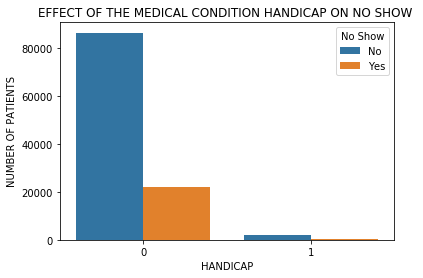

In [46]:
# # Plot for handicap wrt No Show
g = sns.countplot(x=df['Handicap'], hue='NoShow', data=df)
plt.legend(loc='upper right', title='No Show')
plt.xlabel('HANDICAP')
plt.ylabel('NUMBER OF PATIENTS')
plt.title('EFFECT OF THE MEDICAL CONDITION HANDICAP ON NO SHOW')
plt.show()

# It can be seen from the plot that out of the 2237 people who are suffering from diabetes, ~500 don't show up for 
#their appointment.
# # Approximate percentage of No Show for people who are handicapped is: 500/(2237+500)*100 = 18.27%

In [ ]:
# The percentage of No show in each category of medical condition is as follows:
# Hypertension - 7.63
# Diabetes - 11.18
# Alcoholism - 17.24
# Handicap - 18.27
# Therefore, people who are handicapped have the maximum level of No Show followed closely by people who suffer from 
# alcoholism. This could be because it might be difficult for handicapped people to physically reach the clinic/hospital 
# where the appointment is scheduled. 
# People who suffer from alcoholism have the second highest level of No show. This could be because of their denial to admit
# that there is a problem, fear of being judged or fear of suffering from withdrawal.

In [ ]:
### Research Question 5 - Does the number of medical conditions a person is suffering from impact whether a person will 
#show up for their appointment?

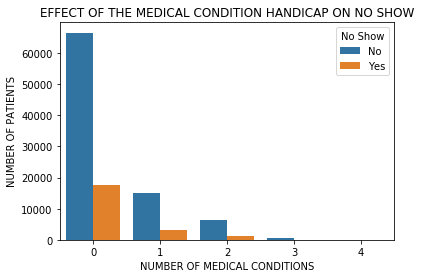

In [52]:
## Plot for a combination of medical conditions wrt No Show
sum_diseases = df['Hypertension'] + df['Diabetes'] + df['Alcoholism'] + df['Handicap'] 
df['Number of Medical Conditions'] = sum_diseases
df['Number of Medical Conditions'].head()

g = sns.countplot(x='Number of Medical Conditions', hue='NoShow', data=df)
plt.legend(loc='upper right', title='No Show')
plt.xlabel('NUMBER OF MEDICAL CONDITIONS')
plt.ylabel('NUMBER OF PATIENTS')
plt.title('EFFECT OF THE MEDICAL CONDITION HANDICAP ON NO SHOW')
plt.show()

# It can be seen from the plot that as the number of medical conditions increases, the likelihood of No show decreases 
# considerably. Therefore, the number of medical conditions can be considered as a property which is inversely proportional
# to No show.

<a id='conclusions'></a>
## Conclusions

From the investigation, I can conclude the following:

1.	Gender does not seem to play a significant role in whether a person turns up for an appointment.
2.	Out all the age groups who schedule an appointment, the maximum No show occours in the veteran category. This could be because veterans might find it difficult to travel to the place of appointment, to remember appointments, to use phones to check for SMS reminders and so on. Hospitals/ Clincs could make special provisons for people in this category like asking a staff member to give vaterans who have scheduled an appointment a reminder call along with the SMS.
3.	Most of the patients have to wait less than 50 days for their appointment and many patients get appointments on the very same day. This shows that appointments are generally scheduled quickly.
4.	Patients who receive SMS reminders are more likely to show up. The effectiveness of SMS reminders is directly proportional to the number of days of waiting. This makes sense because the more the number of days between the Scheduled Day and the Appointment Day, the more likely is a person to forget about the appointment. For a more than 150 day waiting period, the SMS reminder seems to play a significant role in reducing No show. Therefore, SMS reminders should be sent out to patients specially those with long waiting periods.
5.	Even though there are less number of people with scholarships, only 10861, the people with scholarship have more likelihood of No show. It seems as if patients who receive scholarships and do not have to pay for their medical appointments are not as serious about keeping their appointments. 
6. People who are handicapped have the maximum level of No Show followed closely by people who suffer from alcoholism. This could be because it might be difficult for handicapped people to physically reach the clinic/hospital where the appointment is scheduled. Hospitals could provide special consideration to them by providing them some means of transport to reach the hospital.
7. People who suffer from alcoholism have the second highest level of No show. This could be because of their denial to admit that there is a problem, fear of being judged or fear of suffering from withdrawal.The hospital could provide them the option to keep appointments anonymously. Also, some counselling sessions could be provided to help alcoholics come to terms with their condition and to enable them to seek help. 
8.	The number of medical conditions can be considered as a property which is inversely proportional to No show since as the number of medical conditions increases, the likelihood of No show decreases. This is probably because the more the number of medical conditions, the more critical is person's overall condition is and the less likely they are to miss a medical appointment.

List of References:
1. https://www.kaggle.com/joniarroba/noshowappointments
2. https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia
3. https://www.kaggle.com/somrikbanerjee/predicting-show-up-no-show
4. https://sandramossgurung.files.wordpress.com/2018/04/jupyter-notebook-brazilian-healthcare-appointment-data-analysis-using-numpy-and-pandas.pdf
5. https://www.kaggle.com/junkal/predicting-appointment-no-show-using
6. https://www.kaggle.com/thestats/analyzing-the-no-show
7. http://www.datasciencemadesimple.com/get-minimum-value-column-python-pandas/
8. https://www.kaggle.com/ebequet/medical-appointment-no-shows-dataset-clean
9. https://www.kaggle.com/jchen2186/show-or-no-show-visualization-and-prediction
8. https://www.kaggle.com/brenoarosa/appointment-no-show-analysis-and-prediction

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0